# **Load Libraies**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Numpy & matplotlib for notebooks
%pylab inline

# Pandas for data analysis and manipulation
import pandas as pd

# Sparse matrix package for numeric data.
from scipy import sparse

# Module for word embedding (word2vector)
import gensim

# Module for progress monitoring
import tqdm

# Sklearn
from sklearn.preprocessing import StandardScaler # to standardize features by removing the mean and scaling to unit variance (z=(x-u)/s)
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier which optimizes the log-loss function using LBFGS or sdg.
from sklearn.svm import SVC # Support Vector Classification
from sklearn.ensemble import RandomForestClassifier # A meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.decomposition import PCA, TruncatedSVD # Principal component analysis (PCA); dimensionality reduction using truncated SVD.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier for multinomial models
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from sklearn.metrics import roc_auc_score as roc # Compute Area Under the Receiver Operating Characteristic Curve from prediction scores
from sklearn.metrics import roc_curve, auc # Compute ROC; Compute Area Under the Curve (AUC) using the trapezoidal rule
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # Exhaustive search over specified parameter values for a given estimator
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.model_selection import KFold # K-Folds cross-validator providing train/test indices to split data in train/test sets.
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

#XGBoost
from xgboost import XGBRegressor

# Matplotlib
import matplotlib # Data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Seaborn
import seaborn as sns # Statistical data visualization (based on matplotlib)

# Joblib
import joblib # To save models

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [29]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
# Joblib
import joblib # To save models

from collections import defaultdict
# Gensim
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [30]:
# Numpy & matplotlib for notebooks
%pylab inline

# Pandas
import pandas as pd # Data analysis and manipulation

# Sklearn
from sklearn import utils
from sklearn.preprocessing import StandardScaler # to standardize features by removing the mean and scaling to unit variance (z=(x-u)/s)
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier which optimizes the log-loss function using LBFGS or sdg.
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn.model_selection import KFold # K-Folds cross-validator providing train/test indices to split data in train/test sets.
from sklearn.decomposition import PCA, TruncatedSVD # Principal component analysis (PCA); dimensionality reduction using truncated SVD.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier for multinomial models
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from sklearn.metrics import roc_auc_score as roc # Compute Area Under the Receiver Operating Characteristic Curve from prediction scores
from sklearn.metrics import roc_curve, auc # Compute ROC; Compute Area Under the Curve (AUC) using the trapezoidal rule

# Matplotlib
import matplotlib # Data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Seaborn
import seaborn as sns # Statistical data visualization (based on matplotlib)

# Tqdm
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

# Gensim
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Regular Expressions
import re # String manipulation

# Nltk
import nltk # lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import SnowballStemmer # stemmer

from bs4 import BeautifulSoup
from collections import defaultdict
# Joblib
import joblib # To save models

Populating the interactive namespace from numpy and matplotlib


In [31]:
arraypath = '/content/drive/MyDrive/Community Help /Abuse Text classification/NumPyArrays/'
modelpath='/content/drive/MyDrive/Community Help /Abuse Text classification/Models/'
datapath='/content/drive/MyDrive/Community Help /Abuse Text classification/Data/'

In [ ]:
clean_train_comments=joblib.load(arraypath+'clean_train_comments.pkl')
lbls=joblib.load(arraypath+'lbls.pkl')

# **MLP**

In [ ]:
X_text=joblib.load(arraypath+'X_text_MLP.pkl')
y_text=joblib.load(arraypath+'y_text_MLP.pkl')

X_valid=joblib.load(arraypath+'X_valid_MLP.pkl')
y_valid=joblib.load(arraypath+'y_valid_MLP.pkl')

y_text.shape,y_text.shape,X_valid.shape,y_valid.shape,

((15457, 2), (15457, 2), (9661, 4961), (9661, 2))

In [ ]:
mlpClf = joblib.load(modelpath+'mlpClf.pkl')
y_val_score_mlp = mlpClf.predict(X_valid)[:,1]
print(roc(y_valid.argmax(axis=1),y_val_score_mlp))

0.8608304618391277


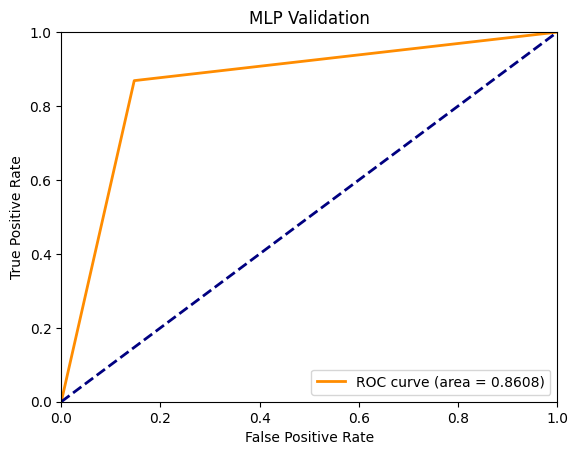

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid.argmax(axis=1), y_val_score_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Validation')
plt.legend(loc="lower right")
plt.show()

In [ ]:
mlpClf = joblib.load(modelpath+'mlpClf.pkl')
y_test_score_mlp = mlpClf.predict(X_text)[:,1]
print(roc(y_text.argmax(axis=1),y_test_score_mlp))

0.8543630925592559


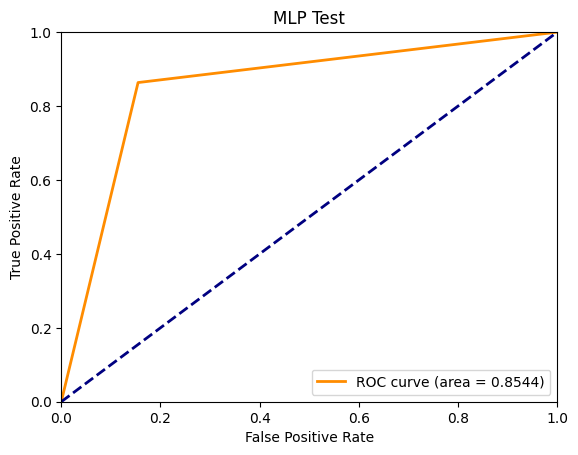

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_text.argmax(axis=1), y_test_score_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Test')
plt.legend(loc="lower right")
plt.show()

In [ ]:
vectorizer=joblib.load(arraypath+'vectorizer_abuse_mlp.pkl')
classes=joblib.load(arraypath+'classes_abuse_mlp.pkl')

In [ ]:
X_vector=vectorizer.transform(['4 initiatives making it easier for researchers & health professionals to access research'])
print(X_vector.shape)
predected_value=mlpClf.predict(X_vector)
#classes[predected_value[0]-1],predected_value[0]-1,classes
classes[predected_value.argmax()],predected_value.argmax(),classes

(1, 4961)


('NON ABUSE', 1, ['ABUSE', 'NON ABUSE'])

# **XGB**

In [ ]:
X_valid=joblib.load(arraypath+'X_valid_XGB.pkl')
y_valid=joblib.load(arraypath+'y_valid_XGB.pkl')

In [ ]:
my_model_XGBRegressor=joblib.load(modelpath+'my_model_XGBRegressor.pkl')
y_score_xgb = my_model_XGBRegressor.predict(X_valid)
print(roc(y_valid.argmax(axis=1),y_score_xgb.argmax(axis=1)))

0.8551378642303967


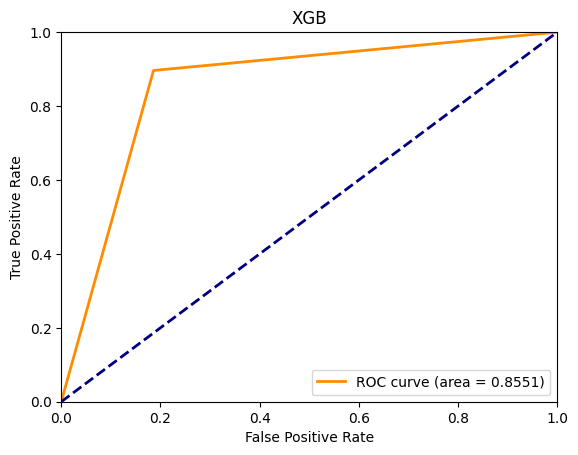

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid.argmax(axis=1), y_score_xgb.argmax(axis=1))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB')
plt.legend(loc="lower right")
plt.show()

In [ ]:
vectorizer2=joblib.load(arraypath+'vectorizer_abuse_XGB.pkl')
classes=joblib.load(arraypath+'classes_abuse_XGB.pkl')

In [ ]:
X_vector=vectorizer2.transform(['4 initiatives making it easier for researchers & health professionals to access research'])
print(X_vector.shape)
my_model_XGBRegressor=joblib.load(modelpath+'my_model_XGBRegressor.pkl')
predected_value=my_model_XGBRegressor.predict(X_vector)
#classes[predected_value[0]-1],predected_value[0]-1,classes
classes[predected_value.argmax()],predected_value.argmax(),classes

(1, 1961)


('ABUSE', 0, ['ABUSE', 'NON ABUSE'])

# **Word2Vec**

In [37]:
train_vectors_dbow=joblib.load(arraypath+'train_vectors_dbow_word2vec.pkl')
valid_vectors_dbow=joblib.load(arraypath+'valid_vectors_dbow_word2vec.pkl')
test_vectors_dbow=joblib.load(arraypath+'test_vectors_dbow_word2vec.pkl')

mlpClf_doc2vec=joblib.load(modelpath+'mlpClf_doc2vec.pkl')
xgb_doc2vec=joblib.load(modelpath+'xgb_doc2vec.pkl')

y_train=joblib.load(arraypath+'y_train_word2vec.pkl')
y_valid=joblib.load(arraypath+'y_valid_word2vec.pkl')
y_test=joblib.load(arraypath+'y_test_word2vec.pkl')

In [38]:
train_vectors_dbow.shape

(61824, 500)

### **MLP Word2Vec**

#### Validation Data ROC

In [ ]:
y_val_score_mlp_doc2vec = mlpClf_doc2vec.predict_proba(valid_vectors_dbow)[:,1]
print(roc(y_valid.argmax(axis=1),y_val_score_mlp_doc2vec))

0.8815361927293037


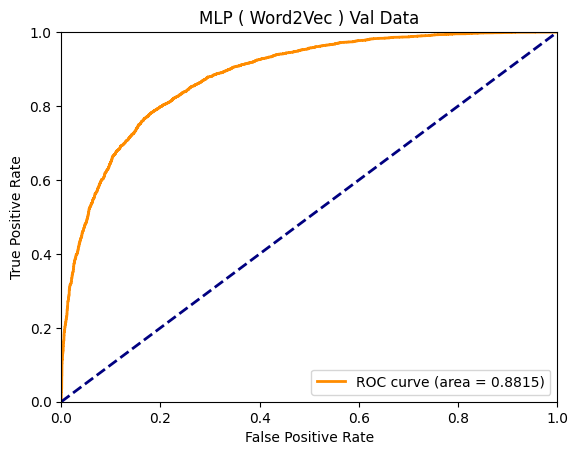

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid.argmax(axis=1), y_val_score_mlp_doc2vec)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ( Word2Vec ) Val Data')
plt.legend(loc="lower right")
plt.show()

#### Text Data ROC

In [ ]:
y_test_score_mlp_doc2vec = mlpClf_doc2vec.predict_proba(test_vectors_dbow)[:,1]
print(roc(y_test.argmax(axis=1),y_test_score_mlp_doc2vec))

0.8840058829952496


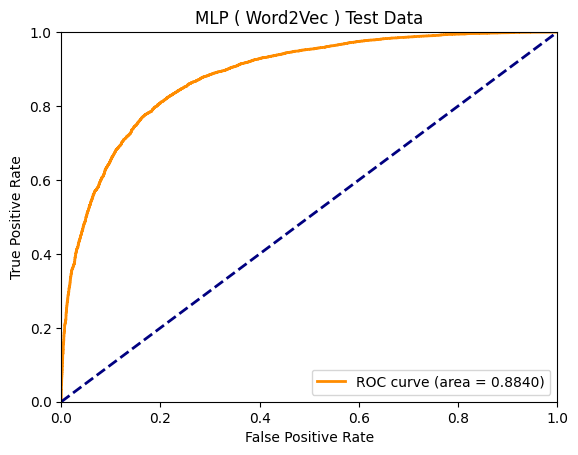

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), y_test_score_mlp_doc2vec)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ( Word2Vec ) Test Data')
plt.legend(loc="lower right")
plt.show()

#### Predection

In [53]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
fname = get_tmpfile(modelpath+"model_dbow_word2vec.model")
mlpClf_doc2vec=joblib.load(modelpath+'mlpClf_doc2vec.pkl')
classes=joblib.load(arraypath+'classes_word2vec.pkl')
modelWV = Word2Vec.load(fname)

In [54]:
inputtext='shut the fuck up. you and the rest of your faggot friends should be burned at the stake'
inputtext=inputtext.split()
vector = modelWV.infer_vector(inputtext)
vector=vector.reshape(1,500)

In [55]:
y_test_score_mlp_doc2vec_pred = mlpClf_doc2vec.predict(vector)
y_test_score_mlp_doc2vec_pred.argmax(axis=1),classes[y_test_score_mlp_doc2vec_pred.argmax(axis=1)[0]]

(array([0]), 'ABUSE')

In [56]:
inputtext='Be careful,Jimbo.OG has a fork with your name on it.'
inputtext=inputtext.split()
vector = modelWV.infer_vector(inputtext)
vector=vector.reshape(1,500)

In [57]:
y_test_score_mlp_doc2vec_pred = mlpClf_doc2vec.predict(vector)
y_test_score_mlp_doc2vec_pred.argmax(axis=1),classes[y_test_score_mlp_doc2vec_pred.argmax(axis=1)[0]]

(array([0]), 'ABUSE')

### **XGB Word2Vec**

#### Validation Data ROC

In [ ]:
y_val_score_xgb_doc2vec = xgb_doc2vec.predict(valid_vectors_dbow)
print(roc(y_valid.argmax(axis=1),y_val_score_xgb_doc2vec.argmax(axis=1)))

0.7980568528674293


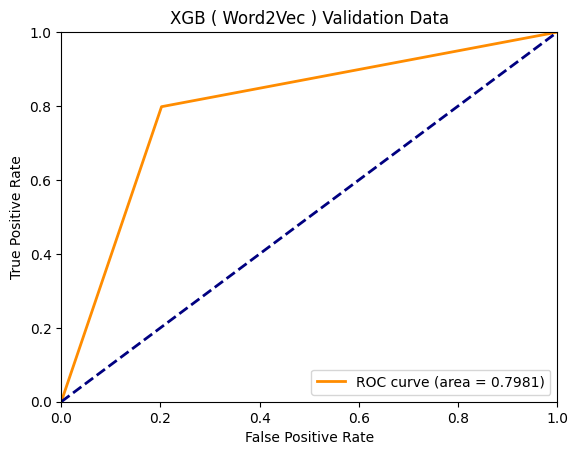

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid.argmax(axis=1), y_val_score_xgb_doc2vec.argmax(axis=1))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ( Word2Vec ) Validation Data')
plt.legend(loc="lower right")
plt.show()

#### Test Data ROC

In [ ]:
y_test_score_xgb_doc2vec = xgb_doc2vec.predict(test_vectors_dbow)
print(roc(y_test.argmax(axis=1),y_test_score_xgb_doc2vec.argmax(axis=1)))

0.8040025821003406


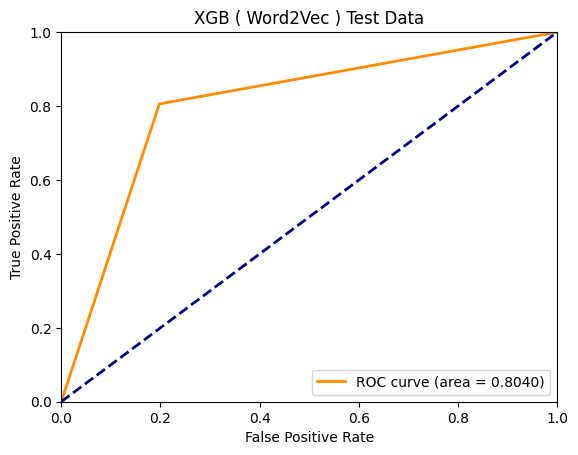

In [ ]:
# roc plot

# Roc Curve for validation data
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), y_test_score_xgb_doc2vec.argmax(axis=1))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)'% roc_auc )

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ( Word2Vec ) Test Data')
plt.legend(loc="lower right")
plt.show()

#### Predection

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
fname = get_tmpfile(modelpath+"model_dbow_word2vec.model")
xgb_doc2vec=joblib.load(modelpath+'xgb_doc2vec.pkl')
classes=joblib.load(arraypath+'classes_word2vec.pkl')
modelWV = Word2Vec.load(fname)

In [49]:
inputtext='shut the fuck up. you and the rest of your faggot friends should be burned at the stake'
inputtext=inputtext.split()
vector = modelWV.infer_vector(inputtext)
vector=vector.reshape(1,500)

In [50]:
y_test_score_mlp_doc2vec_pred = xgb_doc2vec.predict(vector)
y_test_score_mlp_doc2vec_pred.argmax(axis=1),classes[y_test_score_mlp_doc2vec_pred.argmax(axis=1)[0]]

(array([0]), 'ABUSE')

In [51]:
inputtext='Be careful,Jimbo.OG has a fork with your name on it.'
inputtext=inputtext.split()
vector = modelWV.infer_vector(inputtext)
vector=vector.reshape(1,500)

In [52]:
y_test_score_mlp_doc2vec_pred = xgb_doc2vec.predict(vector)
y_test_score_mlp_doc2vec_pred.argmax(axis=1),classes[y_test_score_mlp_doc2vec_pred.argmax(axis=1)[0]]

(array([1]), 'NON ABUSE')

# **LR Classifier**

In [ ]:
# Parameters selection
parameters ={'penalty' : ['l1', 'l2'],
             'C' : [1, 0.1,0.01,0.001,0.0001,0.00001,0.000001,10,100,2,3,2.6],
             "class_weight" : ["balanced",],
             'solver' : [ 'liblinear', 'saga']}

logistic = LogisticRegression(class_weight = "balanced")

# Model exploration
lrClf = GridSearchCV(logistic, param_grid = parameters, cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1001), scoring = "roc_auc" ,verbose=True, n_jobs=-1)

# Model fit
lrClf.fit(X,y_valid)

print("lrCLf.best_score = ", lrClf.best_score_)

# Save model
joblib.dump(lrClf, 'lrClf.pkl')

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


lrCLf.best_score =  0.9391721806105368


[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.0s finished


['lrClf.pkl']